In [2]:
library(umap)
library(ggplot2)
library(ggthemes)

In [3]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [5]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [6]:
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))$x
head(pca.500hvgs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
21843_1#10,-11.7695261,-12.53787,1.182187,-12.382809,-7.138403,-3.4703788,2.937177,-1.4780896,-2.9866449,-3.499148,...,0.2160482,-0.001807227,-0.4704439,-0.38897205,-0.9991925,-0.6878494,-0.22135254,-0.01443568,1.2095867,-0.006544411
21843_1#100,5.1315308,-27.27887,7.580548,-8.358297,-1.009093,-1.7577853,-6.091796,0.8270303,-8.8730029,3.518848,...,0.3031433,1.166374296,0.9316655,0.89767361,-0.8016822,0.2290320,0.64763610,0.85628896,-1.3086225,-0.007651583
21843_1#101,-0.6430211,-23.48309,-1.000591,-3.088449,-1.289849,-1.5541213,-1.469672,0.2329820,-0.7080887,5.016711,...,-0.7761433,0.031156078,0.1829774,-0.14923369,-0.5788981,0.2717518,0.75835568,0.00108464,0.1528594,-0.002594181
21843_1#102,-14.5080208,-12.97380,1.756366,-5.051092,-13.428509,-4.9241155,3.345865,1.1722049,1.1701299,1.799291,...,-1.1940182,0.653650128,-1.4879523,0.40670022,0.1799348,-1.2709706,-0.03973878,0.39435883,0.3794893,-0.003221728
21843_1#103,-5.8029849,-18.93912,-3.213669,-2.972856,-7.899498,0.3855256,3.110171,2.0104264,-0.4341895,-2.414581,...,-0.9986720,0.344452018,-0.6746511,-0.09003629,-0.9505944,-0.5087790,-0.27308513,0.78496806,-0.3265529,-0.005177596
21843_1#105,-2.3442226,-20.86842,-2.850288,-3.369348,-1.915029,-9.2527614,1.396011,2.1962256,-6.2875656,-4.725231,...,-1.8174132,0.912610178,-0.8024645,-0.66096338,-1.1554879,0.1583705,-0.94767054,0.13668247,1.3098005,-0.003567344


In [26]:
# umap0 = umap(prcomp(t(logcounts(sce)))$x[,1:50])

In [11]:
umap0 = umap(pca.500hvgs[,1:100])

In [12]:
df_umap0 = data.frame(umap0$layout)
colnames(df_umap0) = c("UMAP1","UMAP2")
head(df_umap0,2)

,UMAP1,UMAP2
21843_1#10,7.569766,-1.79442454
21843_1#100,8.545688,-0.03947434


In [13]:
df_umap0$day = sce$day

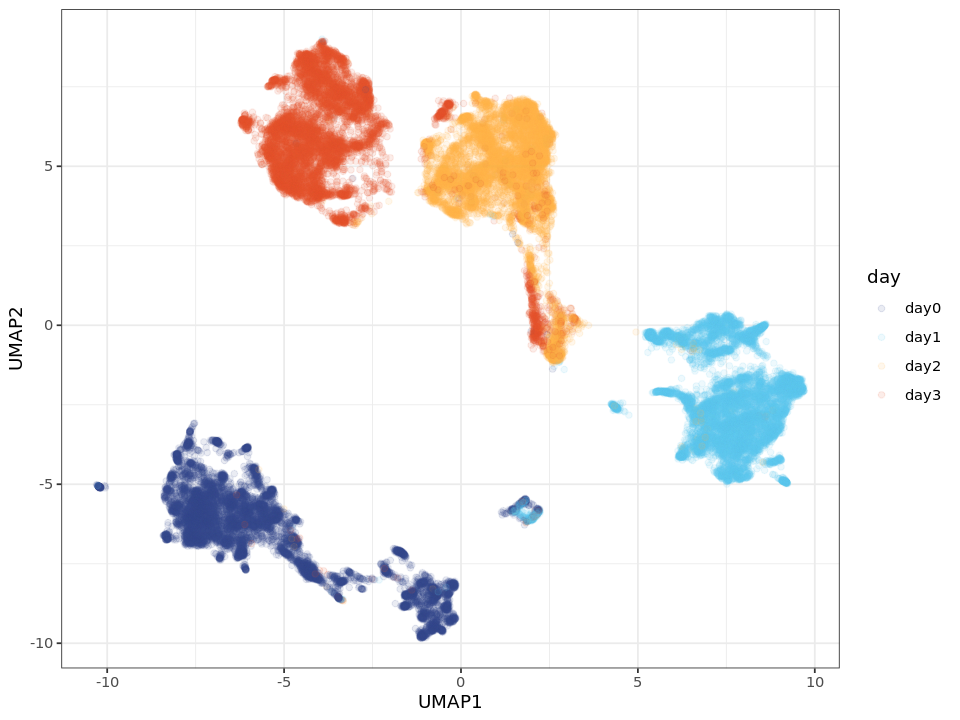

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap0, aes(x = UMAP1, y = UMAP2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [ ]:
# df_sel0 = df_umap0[df_umap0$UMAP1>3 & df_umap0$UMAP2< -5,]
# # df_sel1 = df_umap0[df_umap0$UMAP1>-2.5 & df_umap0$UMAP1< 2.5 & df_umap0$UMAP2< -5,]
# df_sel2 = df_umap0[df_umap0$UMAP1>0 & df_umap0$UMAP1< 3 & df_umap0$UMAP2> -2 & df_umap0$UMAP2< 2.5,]
# cells_sel = c(rownames(df_sel0),rownames(df_sel2))
# length(cells_sel)
# head(cells_sel)

In [15]:
df_sel0 = df_umap0[df_umap0$UMAP1>0 & df_umap0$UMAP2< -5,]
# df_sel1 = df_umap0[df_umap0$UMAP1>-2.5 & df_umap0$UMAP1< 2.5 & df_umap0$UMAP2< -5,]
df_sel2 = df_umap0[df_umap0$UMAP1>0 & df_umap0$UMAP1< 5 & df_umap0$UMAP2> -2 & df_umap0$UMAP2< 2.5,]
cells_sel = c(rownames(df_sel0),rownames(df_sel2))
length(cells_sel)
head(cells_sel)

[1] 1788

[1] "21843_1#229" "21241_7#118" "21241_7#134" "21241_7#213" "21241_7#296"
[6] "21241_7#304"

In [16]:
nrow(df_sel0)
nrow(df_sel2)

[1] 473

[1] 1315

In [17]:
sce_sel = sce[,cells_sel]
ncol(sce_sel)
table(sce_sel$experiment)[order(table(sce_sel$experiment))]

[1] 1788


expt_09 expt_12 expt_21 expt_27 expt_20 expt_10 expt_18 expt_24 expt_30 expt_29 
      1       1       2       2       3      10      10      10      11      17 
expt_38 expt_37 expt_28 expt_35 expt_43 expt_31 expt_45 expt_23 expt_36 expt_22 
     17      18      26      26      27      41      43      47      54      73 
expt_41 expt_40 expt_39 expt_42 expt_44 expt_32 expt_33 expt_34 
     89     122     139     142     145     167     182     363 

In [18]:
sce_sel1 = sce[,!(colnames(sce) %in% cells_sel)]
sce_sel1

class: SingleCellExperiment 
dim: 11231 34256 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(34256): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [20]:
saveRDS(sce_sel1,  "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/endodiff_clean.rds")

In [21]:
df_pca_sel = as.data.frame(prcomp(t(logcounts(sce_sel1[rowData(sce_sel1)$is_intop500hvg,])))$x[,1:50])

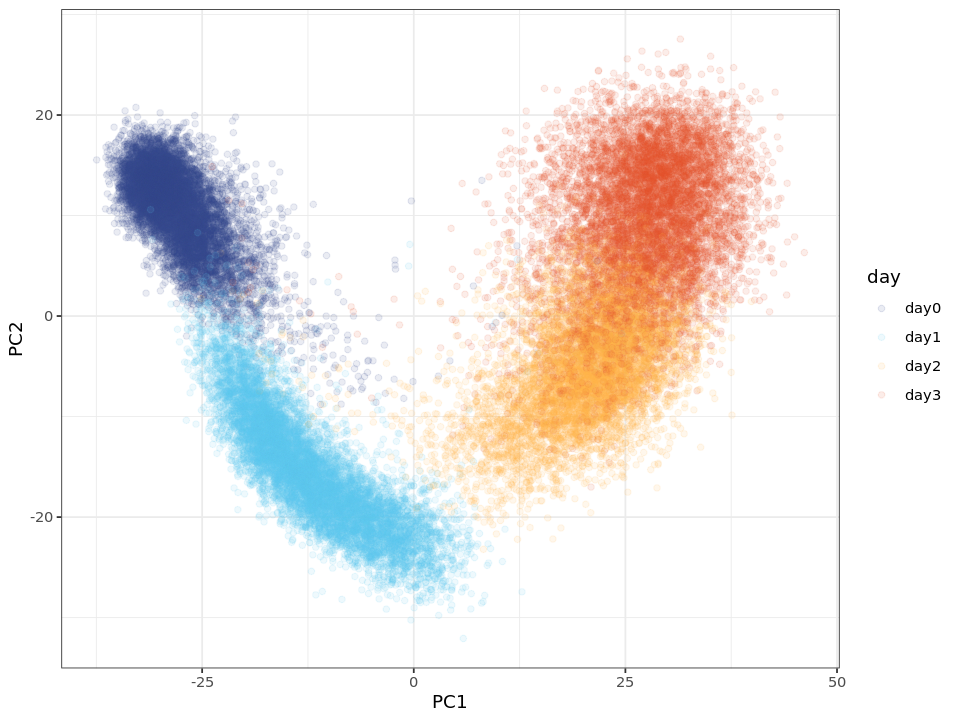

In [22]:
df_pca_sel$day = sce_sel1$day
p = ggplot(df_pca_sel, aes(x = PC1, y = PC2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [18]:
umap_sel = umap(prcomp(t(logcounts(sce_sel1[rowData(sce_sel1)$is_intop500hvg,])))$x[,1:50])

In [19]:
df_umap_sel = data.frame(umap_sel$layout)
colnames(df_umap_sel) = c("UMAP1","UMAP2")

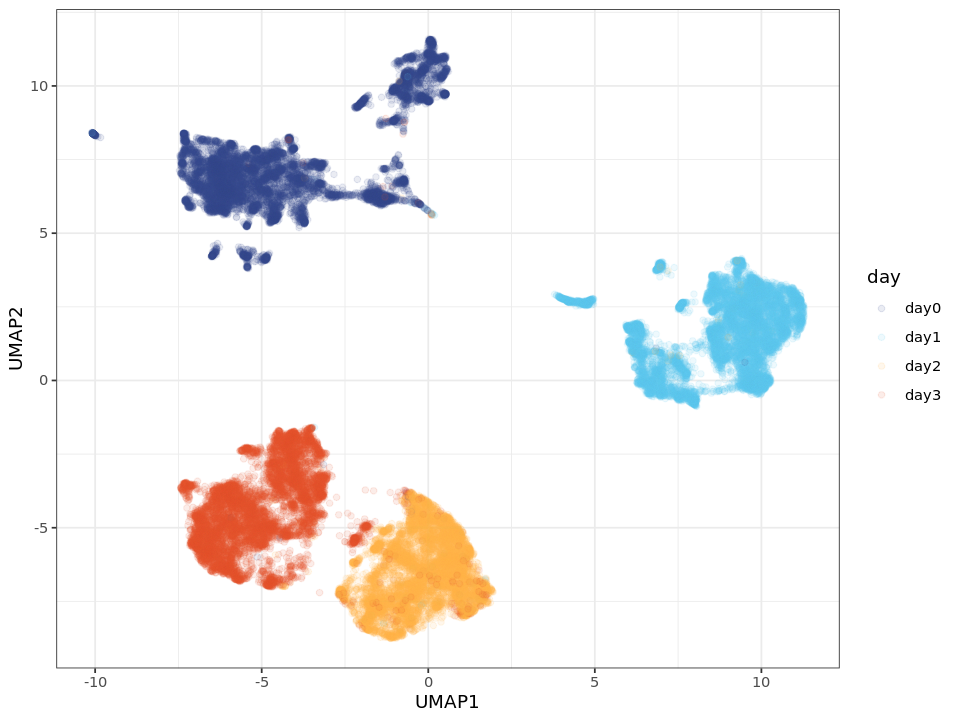

In [20]:
df_umap_sel$day = sce_sel1$day
p = ggplot(df_umap_sel, aes(x = UMAP1, y = UMAP2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [105]:
table(sce_sel$donor)[order(table(sce_sel$donor))]


fasu hayt hecn heth hiaf juuy lise naju pelm poih pulk qehq qunz seru suop tert 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
tout ueah uenn vazt wigw zagm zapk zoio eipl fejf iisa nosn nufh oicx puie qaqx 
   1    1    1    1    1    1    1    1    2    2    2    2    2    2    2    2 
sehl vass hoik qoog rayr toco toss uilk veku wopl yelp fafq iiyk pahc pipw qayj 
   2    2    3    3    3    3    3    3    3    3    3    4    4    4    4    4 
xojn cicb ciwj guyj kajh oaqd sojd wahn kuxp paab hegp feec fawm letw cuhk kucg 
   4    5    5    5    5    5    5    5    6    6    7    8    9   10   11   11 
guss mita bokz lepk nudd datg nocf qorq oibg yoch 
  14   14   15   16   18   25   28   34   42   71 

In [106]:
table(sce_sel$plate_id)[order(table(sce_sel$plate_id))]


0126 0486 1175 1222 1428 1651 1783 1828 2170 2171 2774 2775 2776 2781 2810 3160 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
3161 3223 3293 3300 3303 3351 3377 3378 3380 3383 1176 1283 1353 1786 1787 2039 
   1    1    1    1    1    1    1    1    1    1    2    2    2    2    2    2 
2524 2808 3227 3270 3274 3301 3350 3379 3381 3382 3384 1351 1780 2040 3299 3354 
   2    2    2    2    2    2    2    2    2    2    2    3    3    3    3    3 
3376 1086 2075 2639 3271 3347 3375 1349 2806 2812 3241 3272 3304 1085 1281 1788 
   3    4    4    4    4    4    4    5    5    5    5    5    5    6    6    6 
2807 2640 2169 2778 2165 0247 2073 2520 2777 3306 2074 2780 2779 3308 2525 2166 
   6    7    8    8    9   10   13   15   15   16   17   17   18   21   30   32 
3305 2526 
  39   44 

In [107]:
names(colData(sce))

[1] "adj_x"                                      
  [2] "adj_y"                                      
  [3] "assigned"                                   
  [4] "auxDir"                                     
  [5] "cell_filter"                                
  [6] "cell_name"                                  
  [7] "compatible_fragment_ratio"                  
  [8] "day"                                        
  [9] "diff_population"                            
 [10] "donor"                                      
 [11] "expected_format"                            
 [12] "experiment"                                 
 [13] "frag_dist_length"                           
 [14] "gc_bias_correct"                            
 [15] "index"                                      
 [16] "is_cell_control"                            
 [17] "is_cell_control_bulk"                       
 [18] "is_cell_control_control"                    
 [19] "library_types"                              
 [20] "libType"                                    
 [21] "log10_total_counts"                         
 [22] "log10_total_counts_endogenous"              
 [23] "log10_total_counts_ERCC"                    
 [24] "log10_total_counts_feature_control"         
 [25] "log10_total_counts_MT"                      
 [26] "log10_total_features"                       
 [27] "log10_total_features_endogenous"            
 [28] "log10_total_features_ERCC"                  
 [29] "log10_total_features_feature_control"       
 [30] "log10_total_features_MT"                    
 [31] "mapping_type"                               
 [32] "mates1"                                     
 [33] "mates2"                                     
 [34] "mean_cxcr4_all"                             
 [35] "mean_cxcr4_norm_all"                        
 [36] "mean_cxcr4_norm_sorted"                     
 [37] "mean_cxcr4_sorted"                          
 [38] "mean_tra160_all"                            
 [39] "mean_tra160_norm_all"                       
 [40] "mean_tra160_norm_sorted"                    
 [41] "mean_tra160_sorted"                         
 [42] "median_cxcr4_all"                           
 [43] "median_cxcr4_sorted"                        
 [44] "median_hoechst_all"                         
 [45] "median_hoechst_sorted"                      
 [46] "median_tra160_all"                          
 [47] "median_tra160_sorted"                       
 [48] "n_alt_reads"                                
 [49] "n_events_sorted"                            
 [50] "n_events_total"                             
 [51] "n_total_reads"                              
 [52] "num_assigned_fragments"                     
 [53] "num_bias_bins"                              
 [54] "num_bootstraps"                             
 [55] "num_compatible_fragments"                   
 [56] "num_consistent_mappings"                    
 [57] "num_inconsistent_mappings"                  
 [58] "num_libraries"                              
 [59] "num_mapped"                                 
 [60] "num_processed"                              
 [61] "num_targets"                                
 [62] "nvars_used"                                 
 [63] "output"                                     
 [64] "pct_counts_endogenous"                      
 [65] "pct_counts_ERCC"                            
 [66] "pct_counts_feature_control"                 
 [67] "pct_counts_MT"                              
 [68] "pct_counts_top_100_features"                
 [69] "pct_counts_top_100_features_endogenous"     
 [70] "pct_counts_top_100_features_feature_control"
 [71] "pct_counts_top_200_features"                
 [72] "pct_counts_top_200_features_endogenous"     
 [73] "pct_counts_top_50_features"                 
 [74] "pct_counts_top_50_features_endogenous"      
 [75] "pct_counts_top_50_features_ERCC"            
 [76] "pct_counts_top_50_features_feature_control" 
 [77] "pct_counts_top_500_features"               

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


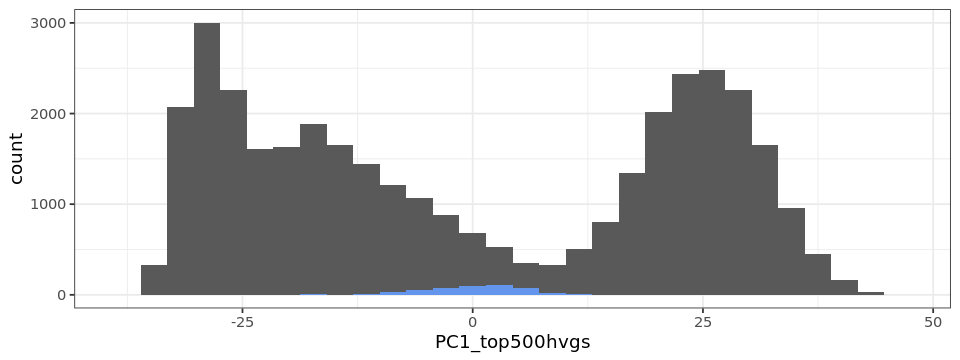

In [108]:
options(repr.plot.width = 8, repr.plot.height = 3)
df_plot = as.data.frame(colData(sce))
# head(df_plot)
# ggplot(df_plot, aes(x = log10(total_counts_endogenous)))+ geom_histogram() + theme_bw() + 
#     geom_histogram(data = df_plot[cells_sel,], aes(x=log10(total_counts_endogenous)), fill = "red") +
#     coord_cartesian(ylim = c(0, 250), xlim = c(4.5, 6.7)) 
# ggplot(df_plot, aes(x = pct_counts_MT))+ geom_histogram() + theme_bw() + 
#     geom_histogram(data = df_plot[cells_sel,], aes(x=pct_counts_MT), fill = "red")
ggplot(df_plot, aes(x = PC1_top500hvgs))+ geom_histogram() + theme_bw() + 
    geom_histogram(data = df_plot[cells_sel,], aes(x=PC1_top500hvgs), fill = "cornflowerblue")

In [7]:
harmony_pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/harmony_pcs.csv"
df_h_pcs = read.csv(harmony_pcs_filename, row.names=1)
head(df_h_pcs)

,hPC1,hPC2,hPC3,hPC4,hPC5,hPC6,hPC7,hPC8,hPC9,hPC10,...,hPC491,hPC492,hPC493,hPC494,hPC495,hPC496,hPC497,hPC498,hPC499,hPC500
21843_1#10,-15.458078,-7.405578,2.184473,-7.9392549,-4.6515881,-0.7943468,1.533785,-2.333101,-0.08331637,-3.432353,...,0.5463426,-0.09517883,-0.4073826,-0.4696924,-1.0450353,-0.6462345,-0.182943597,-0.11435648,1.1101406,-0.004149660
21843_1#100,1.152869,-23.164176,7.331546,-3.9603904,-0.5122186,1.2864816,-5.558488,1.961314,-4.78306835,0.893789,...,0.5256664,1.07775909,1.1118864,0.7997102,-0.8646585,0.1784165,0.698518180,0.65279551,-1.3449614,-0.013467687
21843_1#101,-5.124796,-19.496721,-1.517553,1.6753574,-0.8860894,1.6037593,-1.127056,1.260257,3.61656483,2.527808,...,-0.5369389,-0.06700594,0.3571446,-0.2381873,-0.6441473,0.2240498,0.820377553,-0.20902287,0.1104616,-0.008346626
21843_1#102,-18.149556,-8.308468,2.418825,-0.3906892,-11.4214621,-2.1937043,1.958948,0.282486,4.49319876,1.729732,...,-0.8410434,0.55545922,-1.4273416,0.3243845,0.1419035,-1.2318985,-0.004276031,0.27386754,0.2810552,-0.001140697
21843_1#103,-9.688552,-14.942422,-3.217345,1.8164108,-6.9734765,3.3047105,2.469451,1.869106,3.65090634,-3.597209,...,-0.6719495,0.24479469,-0.5711098,-0.1808131,-0.9917277,-0.5064339,-0.236263249,0.60736127,-0.4008331,-0.006541054
21843_1#105,-6.591543,-16.886189,-3.169841,1.4060010,-1.3065190,-6.2221696,1.368837,2.769150,-2.06831105,-6.709122,...,-1.5454845,0.81543917,-0.6560792,-0.7494862,-1.2121658,0.1296458,-0.893956028,-0.06061641,1.2555961,-0.007572201


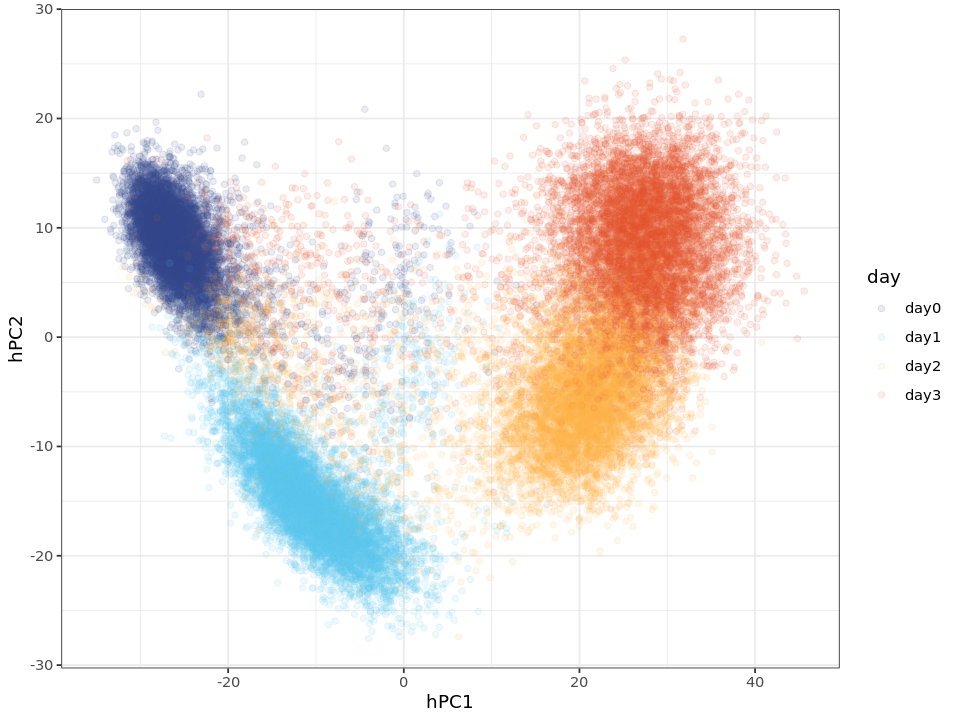

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
df_h_pcs = as.data.frame(df_h_pcs)
df_h_pcs$day = sce$day
p = ggplot(df_h_pcs, aes(x = hPC1, y = hPC2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [118]:
# umap1 = umap(df_h_pcs[,1:50])
umap1 = umap(df_h_pcs)

In [119]:
df_umap1 = data.frame(umap1$layout)
colnames(df_umap1) = c("UMAP1","UMAP2")
head(df_umap1,2)

,UMAP1,UMAP2
21843_1#10,6.805992,3.022282
21843_1#100,4.958582,2.862220


In [120]:
df_umap1$day = sce$day

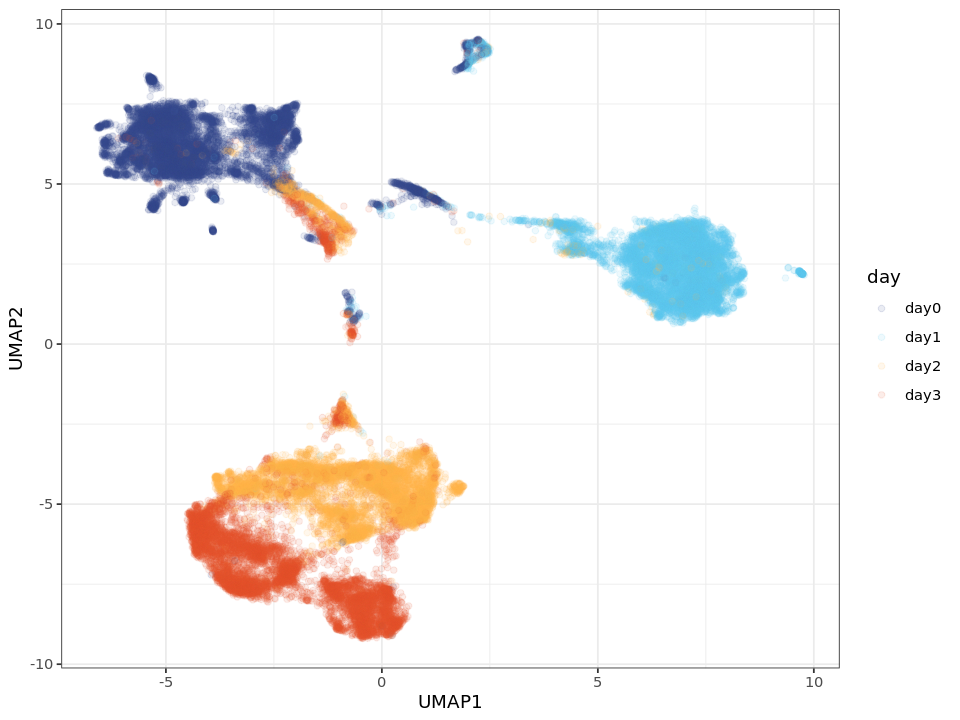

In [121]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap1, aes(x = UMAP1, y = UMAP2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [ ]:
##################################################################
##################################################################
##################################################################

In [2]:
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/10pcs_500hvgs.csv"
df_pcs = read.csv(pcs_filename, row.names=1)
head(df_pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
21843_1#10,-11.7695261,-12.53787,1.182187,-12.382809,-7.138403,-3.4703788,2.937177,-1.4780896,-2.9866449,-3.499148
21843_1#100,5.1315308,-27.27887,7.580548,-8.358297,-1.009093,-1.7577853,-6.091796,0.8270303,-8.8730029,3.518848
21843_1#101,-0.6430211,-23.48309,-1.000591,-3.088449,-1.289849,-1.5541213,-1.469672,0.2329820,-0.7080887,5.016711
21843_1#102,-14.5080208,-12.97380,1.756366,-5.051092,-13.428509,-4.9241155,3.345865,1.1722049,1.1701299,1.799291
21843_1#103,-5.8029849,-18.93912,-3.213669,-2.972856,-7.899498,0.3855256,3.110171,2.0104264,-0.4341895,-2.414581
21843_1#105,-2.3442226,-20.86842,-2.850288,-3.369348,-1.915029,-9.2527614,1.396011,2.1962256,-6.2875656,-4.725231


In [4]:
umap = umap(df_pcs)

In [5]:
umap

umap embedding of 36044 items in 2 dimensions
object components: layout, data, knn, config


In [6]:
df_umap = data.frame(umap$layout)
colnames(df_umap) = c("UMAP1","UMAP2")
head(df_umap)

,UMAP1,UMAP2
21843_1#10,-6.728706,3.4168173
21843_1#100,-6.708156,0.7770645
21843_1#101,-6.435167,0.6802076
21843_1#102,-6.637705,3.7797690
21843_1#103,-7.896532,3.8400846
21843_1#105,-8.082843,3.1207340


In [7]:
write.csv(df_umap, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/umap_from_10pcs.csv")

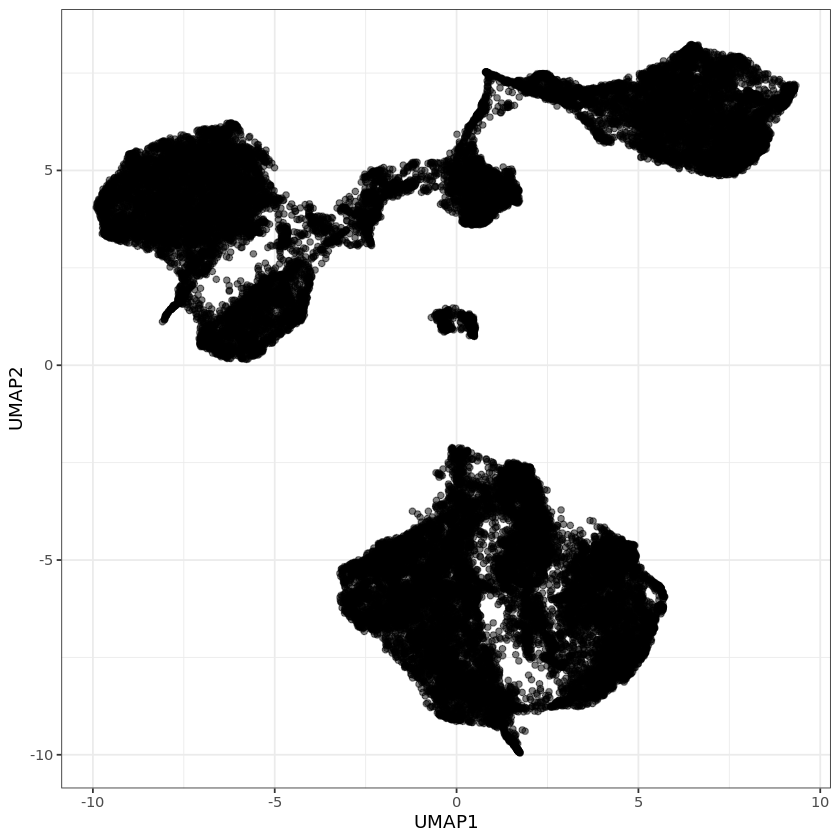

In [10]:
ggplot(df_umap, aes(x = UMAP1, y = UMAP2)) + geom_point(alpha = 0.5) + theme_bw()

In [11]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [14]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [15]:
df_umap$day = sce$day

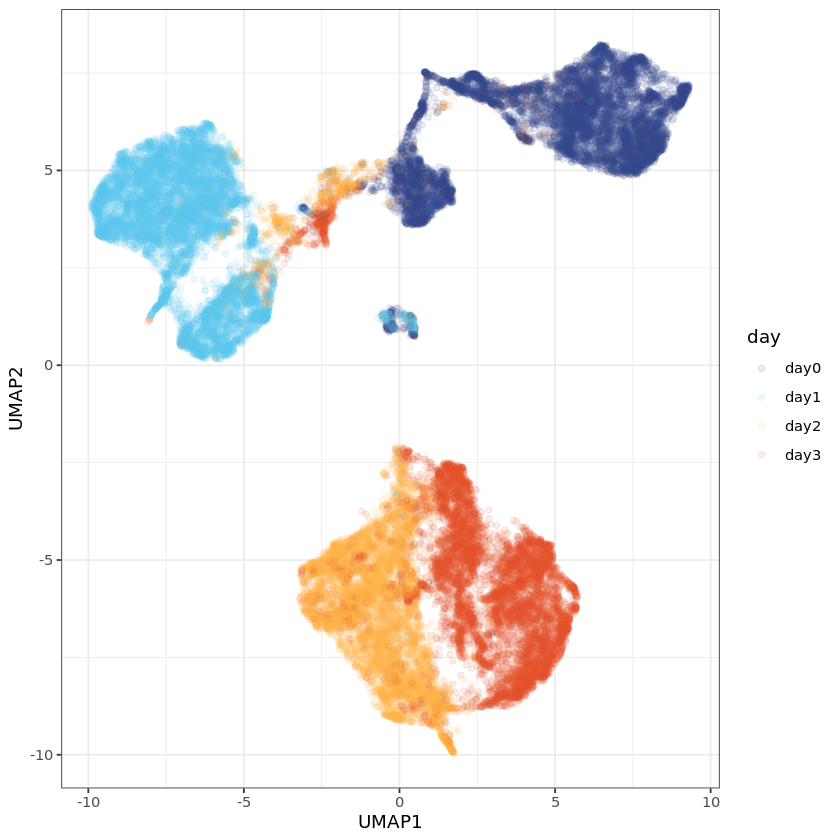

In [18]:
options(repr.plot.width = 5, repr.plot.height = 4)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p